# Analisis de la base de datos Chinook Database
Database URL: https://cdn.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
![Database Schema](https://cdn.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg)

In [2]:
import sqlite3
import requests
import zipfile

## Descargue la tabla chinook de la fuente Web

In [3]:
URL = r"https://cdn.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip"
filename = URL.split("/")[-1]
r = requests.get(URL)

In [4]:
try:
    print(f"Descargando {filename} de {URL}... ", end='')
    with open(filename, mode='wb') as file:
        file.write(r.content)
    print("Hecho")
    
    print(f"Descomprimiendo archivo {filename}... ", end='')
    with zipfile.ZipFile(filename, mode='r') as zip_ref:
        zip_ref.extractall(".//datafile")
    print("Hecho")
except:
    print(f"No se puede obtener el archivo {filename}")

Descargando chinook.zip de https://cdn.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip... Hecho
Descomprimiendo archivo chinook.zip... Hecho


## Inspeccionar la base de datos

In [5]:
database_file = ".//datafile//chinook.db"
conn = sqlite3.connect(database_file)

In [6]:
with conn:
    cur = conn.cursor()
    results = cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
    
    print(f"Tablas en {database_file}")
    print("----------" + "-" * len(database_file))
    for item in results:
        print(item)

Tablas en .//datafile//chinook.db
---------------------------------
('albums',)
('sqlite_sequence',)
('artists',)
('customers',)
('employees',)
('genres',)
('invoices',)
('invoice_items',)
('media_types',)
('playlists',)
('playlist_track',)
('tracks',)
('sqlite_stat1',)


In [13]:
with conn:
    tabla = "invoices"
    cur = conn.cursor()
    results = cur.execute(f"SELECT * FROM {tabla}")
    
    print(f"Columnas en {tabla}")
    print("-----------" + "-" * len(tabla))
    for item in results.description:
        print(item)

Columnas en invoices
-------------------
('InvoiceId', None, None, None, None, None, None)
('CustomerId', None, None, None, None, None, None)
('InvoiceDate', None, None, None, None, None, None)
('BillingAddress', None, None, None, None, None, None)
('BillingCity', None, None, None, None, None, None)
('BillingState', None, None, None, None, None, None)
('BillingCountry', None, None, None, None, None, None)
('BillingPostalCode', None, None, None, None, None, None)
('Total', None, None, None, None, None, None)


In [109]:
# SCRIPT DE INSPECCION DE UNA BASE DE DATOS
database_file = ".//datafile//chinook.db"
conn = sqlite3.connect(database_file)

with conn:
    cur = conn.cursor()
    results = cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
    
    tablas_dict = {}
    
    print(f"Tablas en {database_file.upper()}")
    print("----------" + "-" * len(database_file))
    for idx, item in enumerate(results, start=1):
        print(f"[{idx}]: {item[0].upper()}")
        tablas_dict[idx] = item[0]
    else:
        tab_idx = int(input("Seleccione la tabla a inspeccionar: "))
        
        if tab_idx in tablas_dict:
            tabla = tablas_dict[tab_idx]
            #results = cur.execute(f"SELECT * FROM {tabla}")   Utilizando: results.description
            results = cur.execute(f"PRAGMA table_info ({tabla})")
             
            print(f"\nColumnas en {tabla.upper()}")
            print("-----------" + "-" * len(tabla))
            for item in results:
                # print(f"  * {item[0]}")
                print(f" * {item[1]}: ({item[2]})")
                
        else:
            print("Opcion invalida")
    
        

Tablas en .//DATAFILE//CHINOOK.DB
---------------------------------
[1]: ALBUMS
[2]: SQLITE_SEQUENCE
[3]: ARTISTS
[4]: CUSTOMERS
[5]: EMPLOYEES
[6]: GENRES
[7]: INVOICES
[8]: INVOICE_ITEMS
[9]: MEDIA_TYPES
[10]: PLAYLISTS
[11]: PLAYLIST_TRACK
[12]: TRACKS
[13]: SQLITE_STAT1
Seleccione la tabla a inspeccionar: 7

Columnas en INVOICES
-------------------
 * InvoiceId: (INTEGER)
 * CustomerId: (INTEGER)
 * InvoiceDate: (DATETIME)
 * BillingAddress: (NVARCHAR(70))
 * BillingCity: (NVARCHAR(40))
 * BillingState: (NVARCHAR(40))
 * BillingCountry: (NVARCHAR(40))
 * BillingPostalCode: (NVARCHAR(10))
 * Total: (NUMERIC(10,2))


## Mineria de datos en la dB chinoook.db

In [16]:
# METALLICA ESTA EN LA BASE DE DATOS?
database_file = ".//datafile//chinook.db"
conn = sqlite3.connect(database_file)

with conn:
    cur = conn.cursor()
    sql = """SELECT name FROM artists ORDER BY name"""
    results = cur.execute(sql)
    
    for idx, item in enumerate(results,start=1):
        print(f" {idx}.- {item[0]}")

 1.- A Cor Do Som
 2.- AC/DC
 3.- Aaron Copland & London Symphony Orchestra
 4.- Aaron Goldberg
 5.- Academy of St. Martin in the Fields & Sir Neville Marriner
 6.- Academy of St. Martin in the Fields Chamber Ensemble & Sir Neville Marriner
 7.- Academy of St. Martin in the Fields, John Birch, Sir Neville Marriner & Sylvia McNair
 8.- Academy of St. Martin in the Fields, Sir Neville Marriner & Thurston Dart
 9.- Academy of St. Martin in the Fields, Sir Neville Marriner & William Bennett
 10.- Accept
 11.- Adrian Leaper & Doreen de Feis
 12.- Aerosmith
 13.- Aerosmith & Sierra Leone's Refugee Allstars
 14.- Aisha Duo
 15.- Alanis Morissette
 16.- Alberto Turco & Nova Schola Gregoriana
 17.- Alice In Chains
 18.- Amy Winehouse
 19.- Anne-Sophie Mutter, Herbert Von Karajan & Wiener Philharmoniker
 20.- Antal Doráti & London Symphony Orchestra
 21.- Antônio Carlos Jobim
 22.- Apocalyptica
 23.- Aquaman
 24.- Audioslave
 25.- Avril Lavigne
 26.- Azymuth
 27.- Baby Consuelo
 28.- BackBeat
 2

In [32]:
# METALLICA ESTA EN LA BASE DE DATOS?
database_file = ".//datafile//chinook.db"
conn = sqlite3.connect(database_file)

with conn:
    cur = conn.cursor()
    sql = """SELECT ArtistId, name FROM artists WHERE name LIKE '%metallica%' ORDER BY name"""
    results = cur.execute(sql)
    
    for item in results:
        print(f"{item[0]}: {item[1]}")
        

50: Metallica


In [37]:
# QUE Y CUANTOS ALBUMS TIENE METALLICA EN LA TIENDA
database_file = ".//datafile//chinook.db"
conn = sqlite3.connect(database_file)

with conn:
    cur = conn.cursor()
    parameters = "Metallica"
    
    sql = """SELECT artists.name, COUNT(albums.title) 
             FROM artists JOIN albums 
             ON artists.ArtistId = albums.ArtistId 
             WHERE artists.name = ?"""
    results = cur.execute(sql, (parameters,))
    item = results.fetchone()
    print(f"Albums Registrados de {item[0]}: {item[1]}")
    
    sql = """SELECT artists.name, albums.title
             FROM artists JOIN albums 
             ON artists.ArtistId = albums.ArtistId 
             WHERE artists.name = ?"""
    results = cur.execute(sql, (parameters,))
    
    for item in results:
        print(f"  - {item[0]}: {item[1]}")
        

Albums Registrados de Metallica: 10
  - Metallica: Garage Inc. (Disc 1)
  - Metallica: Black Album
  - Metallica: Garage Inc. (Disc 2)
  - Metallica: Kill 'Em All
  - Metallica: Load
  - Metallica: Master Of Puppets
  - Metallica: ReLoad
  - Metallica: Ride The Lightning
  - Metallica: St. Anger
  - Metallica: ...And Justice For All


In [48]:
# LISTADO DE ALBUMS Y TRACKS DE METALLICA
database_file = ".//datafile//chinook.db"
conn = sqlite3.connect(database_file)

with conn:
    cur = conn.cursor()
    parameters = "Metallica"
    
    sql = """SELECT albums.AlbumId, albums.Title
             FROM artists JOIN albums 
             ON artists.ArtistId = albums.ArtistId 
             WHERE artists.name = ?"""
    results = cur.execute(sql, (parameters,))
    albums_id = [(item[0], item[1]) for item in results]
    
    for title in albums_id:
        parameters = title[0]
        sql = "SELECT Name, UnitPrice FROM tracks WHERE AlbumId = ?"
        results = cur.execute(sql, (parameters,))
        
        print(title[1])
        for idx, track in enumerate(results, start=1):
            print(f"  {idx:2}: {track[0]} - (${track[1]:.2f})")
        else:
            print()
 

Garage Inc. (Disc 1)
   1: Free Speech For The Dumb - ($0.99)
   2: It's Electric - ($0.99)
   3: Sabbra Cadabra - ($0.99)
   4: Turn The Page - ($0.99)
   5: Die Die My Darling - ($0.99)
   6: Loverman - ($0.99)
   7: Mercyful Fate - ($0.99)
   8: Astronomy - ($0.99)
   9: Whiskey In The Jar - ($0.99)
  10: Tuesday's Gone - ($0.99)
  11: The More I See - ($0.99)

Black Album
   1: Enter Sandman - ($0.99)
   2: Sad But True - ($0.99)
   3: Holier Than Thou - ($0.99)
   4: The Unforgiven - ($0.99)
   5: Wherever I May Roam - ($0.99)
   6: Don't Tread On Me - ($0.99)
   7: Through The Never - ($0.99)
   8: Nothing Else Matters - ($0.99)
   9: Of Wolf And Man - ($0.99)
  10: The God That Failed - ($0.99)
  11: My Friend Of Misery - ($0.99)
  12: The Struggle Within - ($0.99)

Garage Inc. (Disc 2)
   1: Helpless - ($0.99)
   2: The Small Hours - ($0.99)
   3: The Wait - ($0.99)
   4: Crash Course In Brain Surgery - ($0.99)
   5: Last Caress/Green Hell - ($0.99)
   6: Am I Evil? - ($0.99)
 

In [54]:
# CUAL ES LA FACTURACION DE METALLICA EN LA TIENDA
database_file = ".//datafile//chinook.db"
conn = sqlite3.connect(database_file)

with conn:
    cur = conn.cursor()
    parameters = "Metallica"
    sql = """SELECT artists.Name, AVG(invoices.Total), SUM(invoices.Total)
             FROM artists 
                 JOIN albums 
                 JOIN tracks
                 JOIN invoice_items
                 JOIN invoices
             ON artists.ArtistId = albums.ArtistId 
                 AND albums.AlbumId = tracks.AlbumId
                 AND tracks.TrackId = invoice_items.TrackId
                 AND invoice_items.invoiceId = invoices.invoiceId
             WHERE artists.name = ?"""
    results = cur.execute(sql, (parameters,))
    
    for item in results:
        print(f"{item[0]} :    Fact. Prom: {item[1]:.2f}USD    Total: {item[2]:.2f}USD")
        

Metallica :    Fact. Prom: 6.59USD    Total: 599.94USD


In [57]:
# QUE PAISES SON LOS QUEMAS CONSUMEN PRODUCTOS DE METALLICA
database_file = ".//datafile//chinook.db"
conn = sqlite3.connect(database_file)

with conn:
    cur = conn.cursor()
    parameters = "Metallica"
    sql = """SELECT customers.Country, SUM(invoices.Total) , AVG(invoices.Total)
             FROM artists 
                 JOIN albums 
                 JOIN tracks
                 JOIN invoice_items
                 JOIN invoices
                 JOIN customers
             ON artists.ArtistId = albums.ArtistId 
                 AND albums.AlbumId = tracks.AlbumId
                 AND tracks.TrackId = invoice_items.TrackId
                 AND invoice_items.invoiceId = invoices.invoiceId
                 AND invoices.CustomerId = customers.CustomerId
             WHERE artists.name = ?
             GROUP BY customers.Country
             ORDER BY SUM(invoices.Total) DESC
             LIMIT 5"""
    results = cur.execute(sql, (parameters,))
    
    for item in results:
        print(f"{item[0]}: {item[1]:.2f} USD   {item[2]:.2f} USD")

USA: 177.21 USD   6.56 USD
Canada: 119.79 USD   7.99 USD
France: 94.05 USD   9.40 USD
United Kingdom: 85.14 USD   9.46 USD
Germany: 53.46 USD   5.94 USD


In [72]:
# CUALES SON LOS TRACKS MAS POPULARES DE METALLICA
database_file = ".//datafile//chinook.db"
conn = sqlite3.connect(database_file)

with conn:
    cur = conn.cursor()
    parameters = "Metallica"
    sql = """SELECT tracks.name, SUM(invoice_items.Quantity)
             FROM artists 
                 JOIN albums 
                 JOIN tracks
                 JOIN invoice_items
             ON artists.ArtistId = albums.ArtistId 
                 AND albums.AlbumId = tracks.AlbumId
                 AND tracks.TrackId = invoice_items.TrackId
             WHERE artists.name = ?
             GROUP BY tracks.name 
             ORDER BY SUM(invoice_items.Quantity) DESC
             LIMIT 10"""
    results = cur.execute(sql, (parameters,))
    
    for item in results:
        print(f"{item[0]}: {item[1]}")

Whiskey In The Jar: 2
The Unforgiven II: 2
The House Jack Built: 2
Stone Cold Crazy: 2
Shoot Me Again: 2
Phantom Lord: 2
Nothing Else Matters: 2
Motorbreath: 2
Leper Messiah: 2
For Whom The Bell Tolls: 2


In [58]:
# CUALES SON LOS ARTISTAS MAS REPRESENTATIVOS POR CADA GENERO MUSICAL

database_file = ".//datafile//chinook.db"
conn = sqlite3.connect(database_file)

with conn:
    cur = conn.cursor()
    
    sql = """SELECT genres.name FROM genres ORDER BY genres.name"""
    
    results = cur.execute(sql)
    generos = []
    for genero in results:
        generos.append(genero[0])
        
   
    for genero in generos:
        print(f"----------------{genero}---------------")
     
        sql = """SELECT artists.Name, SUM(invoice_items.Quantity)
                 FROM artists 
                     JOIN albums 
                     JOIN tracks
                     JOIN invoice_items
                     JOIN genres
                 ON artists.ArtistId = albums.ArtistId 
                     AND albums.AlbumId = tracks.AlbumId
                     AND tracks.TrackId = invoice_items.TrackId
                     AND tracks.GenreId = genres.GenreId
                 WHERE genres.name LIKE ?
                 GROUP BY artists.Name
                 LIMIT 1"""
    
        results = cur.execute(sql,(genero,))
    
        for item in results:
            print(f"Artista:{item[0]} / Total:{item[1]}")


----------------Alternative---------------
Artista:Audioslave / Total:5
----------------Alternative & Punk---------------
Artista:Audioslave / Total:5
----------------Blues---------------
Artista:Buddy Guy / Total:7
----------------Bossa Nova---------------
Artista:Toquinho & Vinícius / Total:15
----------------Classical---------------
Artista:Academy of St. Martin in the Fields & Sir Neville Marriner / Total:1
----------------Comedy---------------
Artista:The Office / Total:9
----------------Drama---------------
Artista:Heroes / Total:11
----------------Easy Listening---------------
Artista:Frank Sinatra / Total:10
----------------Electronica/Dance---------------
Artista:Jamiroquai / Total:5
----------------Heavy Metal---------------
Artista:Iron Maiden / Total:12
----------------Hip Hop/Rap---------------
Artista:House Of Pain / Total:8
----------------Jazz---------------
Artista:Antônio Carlos Jobim / Total:7
----------------Latin---------------
Artista:Antônio Carlos Jobim / Total:

In [48]:
database_file = ".//datafile//chinook.db"
conn = sqlite3.connect(database_file)

with conn:
    cur = conn.cursor()
    sql = """SELECT artists.Name, SUM(invoice_items.Quantity)
             FROM artists 
                 JOIN albums 
                 JOIN tracks
                 JOIN invoice_items
             ON artists.ArtistId = albums.ArtistId 
                 AND albums.AlbumId = tracks.AlbumId
                 AND tracks.TrackId = invoice_items.TrackId
             GROUP BY artists.Name
             ORDER BY SUM(invoice_items.Quantity) DESC
             """
    results = cur.execute(sql)
    
    for item in results:
        print(f"{item[0]}: {item[1]}")

Iron Maiden: 140
U2: 107
Metallica: 91
Led Zeppelin: 87
Os Paralamas Do Sucesso: 45
Deep Purple: 44
Faith No More: 42
Lost: 41
Eric Clapton: 40
R.E.M.: 39
Queen: 37
Creedence Clearwater Revival: 37
Guns N' Roses: 36
Titãs: 34
Green Day: 33
Pearl Jam: 32
Kiss: 31
Various Artists: 29
Van Halen: 29
Red Hot Chili Peppers: 27
Chico Buarque: 27
Lenny Kravitz: 26
The Office: 25
Chico Science & Nação Zumbi: 25
Tim Maia: 24
Smashing Pumpkins: 24
Ozzy Osbourne: 24
Foo Fighters: 22
Antônio Carlos Jobim: 22
Cássia Eller: 21
Caetano Veloso: 21
Spyro Gyra: 20
Gilberto Gil: 20
The Who: 19
The Rolling Stones: 18
Jamiroquai: 18
Djavan: 18
Battlestar Galactica (Classic): 18
Amy Winehouse: 18
The Tea Party: 17
Miles Davis: 17
Legião Urbana: 17
Gene Krupa: 17
The Cult: 16
Cidade Negra: 16
Audioslave: 16
AC/DC: 16
Toquinho & Vinícius: 15
Soundgarden: 15
Milton Nascimento: 15
The Black Crowes: 14
O Terço: 13
Lulu Santos: 13
Heroes: 13
Elis Regina: 13
System Of A Down: 12
Santana: 12
Nirvana: 12
James Brown:

In [54]:
# CUALES SON LOS TRACKS Y SUS GENEROS MAS POPULARES DE IRON MAIDEN
database_file = ".//datafile//chinook.db"
conn = sqlite3.connect(database_file)

with conn:
    cur = conn.cursor()
    parameters = "Iron Maiden"
    sql = """SELECT tracks.name, genres.name, SUM(invoice_items.Quantity)
             FROM artists 
                 JOIN albums 
                 JOIN tracks
                 JOIN invoice_items
                 JOIN genres
             ON artists.ArtistId = albums.ArtistId 
                 AND albums.AlbumId = tracks.AlbumId
                 AND tracks.TrackId = invoice_items.TrackId
                 AND tracks.GenreId = genres.GenreId
             WHERE artists.name = ?
             GROUP BY tracks.name 
             ORDER BY SUM(invoice_items.Quantity) DESC"""
    results = cur.execute(sql, (parameters,))
    
    for item in results:
        print(f"{item[0]}/ {item[1]}: {item[2]}")

The Trooper/ Metal: 5
The Number Of The Beast/ Metal: 4
Hallowed Be Thy Name/ Rock: 4
Where Eagles Dare/ Metal: 3
Heaven Can Wait/ Metal: 3
Can I Play With Madness/ Metal: 3
Blood Brothers/ Rock: 3
2 Minutes To Midnight/ Metal: 3
Wrathchild/ Rock: 2
The Wicker Man/ Rock: 2
The Thin Line Between Love & Hate/ Rock: 2
The Prisoner/ Metal: 2
The Evil That Men Do/ Rock: 2
The Clairvoyant/ Metal: 2
The Aftermath/ Rock: 2
Sign Of The Cross/ Metal: 2
Sanctuary/ Rock: 2
Run To The Hills/ Metal: 2
Run Silent Run Deep/ Metal: 2
Powerslave/ Metal: 2
Moonchild/ Metal: 2
Judgement Of Heaven/ Rock: 2
Iron Maiden/ Metal: 2
Ghost Of The Navigator/ Rock: 2
Gangland/ Metal: 2
For the Greater Good of God/ Rock: 2
Fear Of The Dark/ Rock: 2
Dream Of Mirrors/ Rock: 2
Don't Look To The Eyes Of A Stranger/ Rock: 2
Afraid To Shoot Strangers/ Rock: 2
Aces High/ Metal: 2
Wildest Dreams/ Heavy Metal: 1
Wasting Love/ Metal: 1
Transylvania/ Metal: 1
To Tame A Land/ Metal: 1
These Colours Don't Run/ Rock: 1
The Unbel

In [63]:
# MOSTRAR LOS TOP 20 DE LAS CANCIONES MAS VENDIDAS

database_file = ".//datafile//chinook.db"
conn = sqlite3.connect(database_file)

with conn:
    cur = conn.cursor()
    sql = """SELECT tracks.Name, SUM(invoice_items.Quantity)
             FROM tracks
                 JOIN invoice_items
             ON tracks.TrackId = invoice_items.TrackId
             GROUP BY tracks.Name
             ORDER BY SUM(invoice_items.Quantity) DESC
             LIMIT 20"""
    results = cur.execute(sql)
    
    for item in results:
        print(f"{item[0]}: {item[1]}")

The Trooper: 5
Untitled: 4
The Number Of The Beast: 4
Sure Know Something: 4
Hallowed Be Thy Name: 4
Eruption: 4
Where Eagles Dare: 3
Welcome Home (Sanitarium): 3
Sweetest Thing: 3
Surrender: 3
Stairway To Heaven: 3
Selvagem: 3
Sanctuary: 3
Release: 3
Plaster Caster: 3
Linha Do Equador: 3
Iron Maiden: 3
Heaven Can Wait: 3
Good Golly Miss Molly: 3
Flying High Again: 3


------ 20 CANCIONES MÁS LARGAS---------
Occupation / Precipice: 88.12 min
Through a Looking Glass: 84.81 min
Greetings from Earth, Pt. 1: 49.34 min
The Man With Nine Lives: 49.28 min
Battlestar Galactica, Pt. 2: 49.27 min
Battlestar Galactica, Pt. 1: 49.21 min
Murder On the Rising Star: 48.93 min
Battlestar Galactica, Pt. 3: 48.80 min
Take the Celestra: 48.79 min
Fire In Space: 48.78 min
The Long Patrol: 48.75 min
The Magnificent Warriors: 48.75 min
The Living Legend, Pt. 1: 48.74 min
The Gun On Ice Planet Zero, Pt. 2: 48.74 min
The Hand of God: 48.73 min
Experiment In Terra: 48.73 min
War of the Gods, Pt. 2: 48.72 min
The Living Legend, Pt. 2: 48.72 min
War of the Gods, Pt. 1: 48.71 min
Lost Planet of the Gods, Pt. 1: 48.71 min


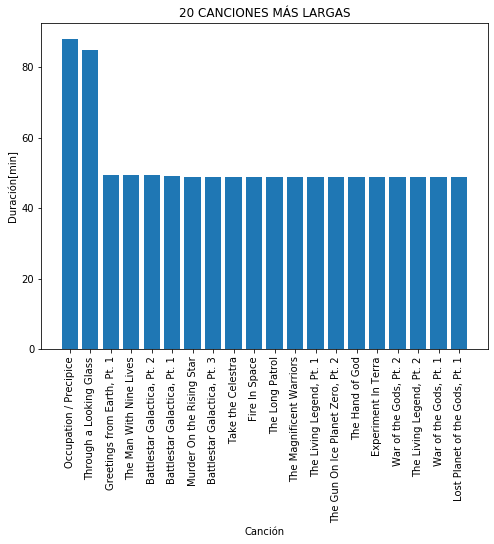

In [107]:
# CUALES SON LAS TOP 10 CANCIONES MAS LARGAS DE LA TIENDA (BARRAS)

import numpy as np
import matplotlib.pyplot as plt

database_file = ".//datafile//chinook.db"
conn = sqlite3.connect(database_file)

with conn:
    cur = conn.cursor()
    sql = """SELECT tracks.Name, tracks.Milliseconds
             FROM tracks
             ORDER BY tracks.Milliseconds DESC
             LIMIT 20"""
    results = cur.execute(sql)
    x=[]
    y=[]
    canciones=[]
    print("------ 20 CANCIONES MÁS LARGAS---------")
    for item in results:
        print(f"{item[0]}: {item[1]/60000:.2f} min")
        canciones.append((item[0],item[1]/60000))
        x.append(item[0])
        y.append(item[1]/60000)
        
x = np.array(x)
y = np.array(y)

fig, ax = plt.subplots(figsize=(8, 6))

plt.bar(x, y)
ax.set_title("20 CANCIONES MÁS LARGAS")
ax.set_xlabel("Canción")
ax.set_ylabel("Duración[min]")
ax.tick_params('x',labelrotation=90)
plt.show()



In [104]:
dir(ax.set_xticks)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

Cliente: Zimmermann / Monto total: 43.62
Cliente: Wójcik / Monto total: 37.62
Cliente: Wichterlová / Monto total: 40.62
Cliente: Van der Berg / Monto total: 40.62
Cliente: Tremblay / Monto total: 39.62
Cliente: Taylor / Monto total: 37.62
Cliente: Sullivan / Monto total: 37.62
Cliente: Stevens / Monto total: 42.62
Cliente: Srivastava / Monto total: 36.64
Cliente: Smith / Monto total: 39.62
Cliente: Silk / Monto total: 37.62
Cliente: Schröder / Monto total: 37.62
Cliente: Schneider / Monto total: 37.62
Cliente: Sampaio / Monto total: 37.62
Cliente: Rojas / Monto total: 46.62
Cliente: Rocha / Monto total: 37.62
Cliente: Ramos / Monto total: 37.62
Cliente: Ralston / Monto total: 43.62
Cliente: Philips / Monto total: 37.62
Cliente: Peterson / Monto total: 38.62
Cliente: Peeters / Monto total: 37.62
Cliente: Pareek / Monto total: 38.62
Cliente: O'Reilly / Monto total: 45.62
Cliente: Nielsen / Monto total: 37.62
Cliente: Muñoz / Monto total: 37.62


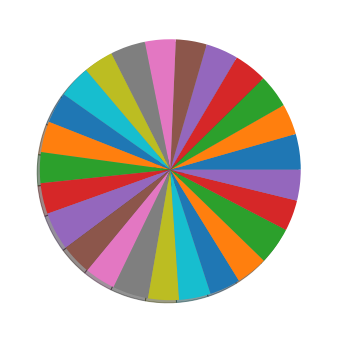

In [129]:
# CUALES SON LOS TOP 25 CLIENTES DE LA TIENDA (PIE)

database_file = ".//datafile//chinook.db"
conn = sqlite3.connect(database_file)

with conn:
    cur = conn.cursor()
    sql = """SELECT customers.LastName, SUM(invoices.Total)
             FROM customers JOIN invoices
             ON customers.CustomerId = invoices.CustomerId
             GROUP BY customers.CustomerId
             ORDER BY customers.LastName DESC
             LIMIT 25"""
    results = cur.execute(sql)
    x=[]
    for item in results:
        print(f"Cliente: {item[0]} / Monto total: {item[1]:.2f}")
        x.append(item[1])
        

fig, ax = plt.subplots(figsize=(8, 6))

plt.pie(x, shadow=True)

plt.show()



